In [1]:
import pandas as pd
import numpy as np

## Import data

In [2]:
# Import data
race_df = pd.read_csv("race_results_with_ids_1.csv")
race_df

,Race ID,Race Name,Race Time,Track Info,Weather Icon,Grade,Finish Position,Bracket Number,Horse Number,Horse Name,...,Final Time,Margin,Position at Bends,Last 3F,Odds,Favorite,Horse Weight (kg),Trainer,Owner,Prize (¥ mil)
0,198906050510,NaN,15:25,T1600m(R Outer),Weather01,G3,1,8,15,Yamatake Sally,...,1:35.5,NaN,1-1-1,35.4,14.9,8.0,452(+6),S.Hatakeyama,Takeyuki Yamanaka,28.0
1,198906050510,NaN,15:25,T1600m(R Outer),Weather01,G3,2,3,5,Takara Smile,...,1:35.5,hd,5-5-4,34.9,13.0,7.0,474(+4),E.Sakamoto,Teruo Murayama,11.0
2,198906050510,NaN,15:25,T1600m(R Outer),Weather01,G3,3,6,10,Feather My Hat,...,1:35.5,nse,3-3-3,35.2,4.7,2.0,416(0),K.Hongo,Shadai Race Horse Co. Ltd.,7.0
3,198906050510,NaN,15:25,T1600m(R Outer),Weather01,G3,4,1,1,Asahi Pasion,...,1:35.7,1.1/4,8-7-7,34.9,3.4,1.0,478(0),Z.Ishige,K.Terauchi,4.2
4,198906050510,NaN,15:25,T1600m(R Outer),Weather01,G3,5,3,4,Star Roman,...,1:35.9,1.1/4,2-2-2,35.7,5.3,3.0,476(-4),K.Takamatsu,Horseman,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61397,202510011011,KOKURA DAISHOTEN,15:20,T1800m(R),Weather02,G3,10,7,11,Yamanin Ours,...,1:47.0,3/4,2-2-2-2,36.3,6.4,3.0,600(+9),T.Saito,Hajime Doi,NaN
61398,202510011011,KOKURA DAISHOTEN,15:20,T1800m(R),Weather02,G3,11,8,14,Air Fanditha,...,1:47.0,hd,12-11-13-13,34.5,17.9,9.0,460(-10),M.Ikezoe,Lucky Field Co. Ltd.,NaN
61399,202510011011,KOKURA DAISHOTEN,15:20,T1800m(R),Weather02,G3,12,8,13,Galaxy Knight,...,1:47.4,2.1/2,9-9-11-11,35.1,32.1,13.0,506(-2),T.Kikuzawa,Lion Race Horse Co. Ltd.,NaN
61400,202510011011,KOKURA DAISHOTEN,15:20,T1800m(R),Weather02,G3,13,4,5,Ho O Purosangue,...,1:47.4,nse,6-4-3-4,35.9,10.3,6.0,490(-2),Y.Yahagi,Yoshihisa Ozasa,NaN


In [3]:
race_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61402 entries, 0 to 61401
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Race ID            61402 non-null  int64  
 1   Race Name          58907 non-null  object 
 2   Race Time          61402 non-null  object 
 3   Track Info         55261 non-null  object 
 4   Weather Icon       61402 non-null  object 
 5   Grade              61402 non-null  object 
 6   Finish Position    61402 non-null  object 
 7   Bracket Number     61402 non-null  int64  
 8   Horse Number       61402 non-null  int64  
 9   Horse Name         61386 non-null  object 
 10  Horse ID           61402 non-null  int64  
 11  Age/Sex            61402 non-null  object 
 12  Weight (kg)        61402 non-null  float64
 13  Jockey             61179 non-null  object 
 14  Final Time         60714 non-null  object 
 15  Margin             56344 non-null  object 
 16  Position at Bends  609

## Cleaning data
* Group by ‘Race ID’ and filter out data for races with Grade G1
* Preprocess and delete some meaningless columns
* Handle null values
* Numeric conversion

In [4]:
# race_df['Track Info'] = race_df['Track Info'].fillna('T2000m')
# filtered_race_df = race_df.groupby('Race ID').
filtered_race_df = race_df[race_df['Grade'] == 'G1']
num_groups = filtered_race_df['Race ID'].nunique()
print(f"There are {num_groups} races")

There are 695 races, each with exactly 16 horses.


In [5]:
filtered_race_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11602 entries, 62 to 61373
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Race ID            11602 non-null  int64  
 1   Race Name          11132 non-null  object 
 2   Race Time          11602 non-null  object 
 3   Track Info         10807 non-null  object 
 4   Weather Icon       11602 non-null  object 
 5   Grade              11602 non-null  object 
 6   Finish Position    11602 non-null  object 
 7   Bracket Number     11602 non-null  int64  
 8   Horse Number       11602 non-null  int64  
 9   Horse Name         11599 non-null  object 
 10  Horse ID           11602 non-null  int64  
 11  Age/Sex            11602 non-null  object 
 12  Weight (kg)        11602 non-null  float64
 13  Jockey             11545 non-null  object 
 14  Final Time         11499 non-null  object 
 15  Margin             10779 non-null  object 
 16  Position at Bends  11533 n

In [6]:
# View the number of distinct values for each string field
string_columns = filtered_race_df.select_dtypes(include=['object']).columns
string_columns_unique_counts = filtered_race_df[string_columns].nunique()
# Output the number of different values for each string field
string_columns_unique_counts

Race Name              53
Race Time              10
Track Info             18
Weather Icon            3
Grade                   1
Finish Position        34
Horse Name           4958
Age/Sex                28
Jockey                448
Final Time            878
Margin                 27
Position at Bends    3232
Odds                 2415
Horse Weight (kg)    1303
Trainer               557
Owner                1450
dtype: int64

In [7]:
# Preprocessing to delete some columns
# Race Name, meaningless
# Prize (¥ mil) too many defaults
# Final Time, Margin are easy to leak the target
# Position at Bends information
# Last 3F is the data during the race and is easy to leak the target
# This project mainly studies the relevant characteristics of horses, so some subjective characteristics Odds, Favorite, Horse Number are removed
drop_cols = [
    'Horse Name',
    'Race Name',
    'Prize (¥ mil)',
    'Margin',
    'Odds',
    'Horse Number',
    'Race Time',
    'Position at Bends',
    'Last 3F',
    'Jockey', 
    'Trainer',
    'Owner',
    'Grade'
]

filtered_race_df = filtered_race_df.drop(columns=drop_cols)

In [8]:
# Handle null values
# Fill with mean
filtered_race_df['Horse Weight (kg)'] = filtered_race_df['Horse Weight (kg)'].fillna(filtered_race_df['Horse Weight (kg)'].mode()[0])

In [9]:
filtered_race_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11602 entries, 62 to 61373
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Race ID            11602 non-null  int64  
 1   Track Info         10807 non-null  object 
 2   Weather Icon       11602 non-null  object 
 3   Finish Position    11602 non-null  object 
 4   Bracket Number     11602 non-null  int64  
 5   Horse ID           11602 non-null  int64  
 6   Age/Sex            11602 non-null  object 
 7   Weight (kg)        11602 non-null  float64
 8   Final Time         11499 non-null  object 
 9   Favorite           11542 non-null  float64
 10  Horse Weight (kg)  11602 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1.1+ MB


## Feature selection
* Feature transformation
* View data distribution graph
* View data correlation graph

In [10]:
new_race_df = filtered_race_df.copy()
# Extract the distance as an integer type and fill NaN values ​​with 0
new_race_df['Track_Distance'] = new_race_df['Track Info'].str.extract(r'T(\d+)m')[0].fillna(0).astype(int)
# Delete the original Track Info column
new_race_df = new_race_df.drop(columns=['Track Info'])
# Extract age and gender
new_race_df['Age'] = new_race_df['Age/Sex'].str.extract(r'(\d+)').astype(int)  # Extract the numeric part as age
new_race_df['Sex'] = new_race_df['Age/Sex'].str.extract(r'([MFCHG])')  # Extract the alphabetic part as gender # Get all unique categories of the sex column
# Remove the original 'Age/Sex' column
new_race_df = new_race_df.drop(columns=['Age/Sex'])
new_race_df['Horse Weight (kg)'] = new_race_df['Horse Weight (kg)'].str.extract(r'(\d+\.?\d*)').astype(float)
# Delete the '(DQ)' part of 'Finish Position' and keep only the ranking
new_race_df['Finish Position'] = new_race_df['Finish Position'].str.replace(r'\(DQ\)', '', regex=True)
# Convert DNF, DQ, NR to corresponding values: -1, -2, -3
new_race_df['Finish Position'] = new_race_df['Finish Position'].replace({
    'DNF': -1,
    'DQ': -2,
    'NR': -3
})
new_race_df = new_race_df[~new_race_df['Finish Position'].isin([-1, -2, -3])]
# Convert the Finish Position column to numeric type
new_race_df['Finish Position'] = pd.to_numeric(new_race_df['Finish Position'], errors='coerce')
# new_race_df['Top3'] = new_race_df['Finish Position'].apply(lambda x: 1 if x in [1, 2, 3] else 0)

In [11]:
# Calculate the Top 3 percentage of a horse in historical competitions
# Create a new column to store the results
new_race_df['Top 3 percentage'] = np.nan
new_race_df = new_race_df.reset_index(drop=True)
# For each horse, build an index of all its races
horse_history = new_race_df.groupby('Horse ID')['Finish Position'].apply(lambda x: x.index.tolist()).to_dict()
# Iterate over each horse
for horse_id, indices in horse_history.items():
    past_positions = []
    for i, idx in enumerate(indices):
        # Extract all previous results of the horse (excluding the current field)
        if i > 0:
            history_positions = [new_race_df.loc[j, 'Finish Position'] for j in indices[:i] 
                                 if new_race_df.loc[j, 'Finish Position'] in [1, 2, 3]]
            total_history = i  
            if total_history > 0:
                prob = len(history_positions) / total_history
                new_race_df.loc[idx, 'Top 3 percentage'] = prob
        else:
            new_race_df.loc[idx, 'Top 3 percentage'] = 0 

In [12]:
# Calculate the average speed of the horse in historical races
def convert_time_to_seconds(t):
    try:
        if isinstance(t, str) and ':' in t:
            minutes, seconds = t.split(':')
            return int(minutes) * 60 + float(seconds)
        elif isinstance(t, (float, int)):
            return float(t)
    except:
        return None
    return None

new_race_df['Final Time (sec)'] = new_race_df['Final Time'].apply(convert_time_to_seconds)
# Add velocity column (unit: meters per second)
new_race_df['Speed (m/s)'] = new_race_df['Track_Distance'] / new_race_df['Final Time (sec)']
# Initialize average speed column
new_race_df['Avg Speed (m/s)'] = 0.0
# For each horse, construct an index of all its races (in order)
horse_history = new_race_df.groupby('Horse ID')['Speed (m/s)'].apply(lambda x: x.index.tolist()).to_dict()
# Traverse the race records of each horse
for horse_id, indices in horse_history.items():
    cumulative_speed = 0.0
    for i, idx in enumerate(indices):
        if i == 0:
            avg_speed = 0.0
        else:
            avg_speed = cumulative_speed / i
        new_race_df.loc[idx, 'Avg Speed (m/s)'] = avg_speed
        # Accumulate the speed of the current game
        cumulative_speed += new_race_df.at[idx, 'Speed (m/s)']

In [13]:
# Add opponent information
# Total weight
new_race_df['Total_Weight'] = new_race_df['Horse Weight (kg)'] + new_race_df['Weight (kg)']
# Grouping and sorting
new_race_df['Weight_Rank'] = new_race_df.groupby('Race ID')['Total_Weight'].rank(ascending=False, method='min')
# Age ranking
new_race_df['Age_Rank'] = new_race_df.groupby('Race ID')['Age'].rank(ascending=True, method='min')
# Favorite Ranking
new_race_df['Favorite_Rank'] = new_race_df.groupby('Race ID')['Favorite'].rank(ascending=True, method='min')
# Top 3 percentage Ranking
new_race_df['Top3_Rank'] = new_race_df.groupby('Race ID')['Top 3 percentage'].rank(ascending=False, method='min')
# Speed (m/s) Ranking
new_race_df['Speed (m/s)_Rank'] = new_race_df.groupby('Race ID')['Avg Speed (m/s)'].rank(ascending=False, method='min')

rank_columns = [
    'Weight (kg)',
    'Age',
    'Favorite',
    'Top 3 percentage',
    'Avg Speed (m/s)'
]

# Add a Scale column for each Rank column = current value / average value of other horses in the same game
for col in rank_columns:
    mean_col_name = f'{col}_Mean'
    scale_col_name = f'{col}_Scale'
    
    # Calculate the average of each race except the current horse
    new_race_df[mean_col_name] = new_race_df.groupby('Race ID')[col].transform(
        lambda x: (x.sum() - x) / (len(x) - 1) if len(x) > 1 else 0
    )
    new_race_df[mean_col_name] = new_race_df[mean_col_name].replace(0, 1e-6)
    # Current value / average value after excluding this horse
    new_race_df[scale_col_name] = new_race_df[col] / new_race_df[mean_col_name]
    new_race_df[scale_col_name] = new_race_df[scale_col_name].fillna(0)

# Delete the middle mean column
# new_race_df.drop(columns=[f'{col}_Mean' for col in rank_columns], inplace=True)

In [14]:
from sklearn.preprocessing import LabelEncoder
import joblib

columns_to_encode = ['Weather Icon', 'Sex']
label_encoders = {}
mapping_tables = {}

for col in columns_to_encode:
    label_encoder = LabelEncoder()
    new_race_df[col] = label_encoder.fit_transform(new_race_df[col].astype(str))
    label_encoders[col] = label_encoder
    
    mapping_df = pd.DataFrame({
        f'{col}_original': label_encoder.classes_,
        f'{col}_encoded': range(len(label_encoder.classes_))
    })
    mapping_tables[col] = mapping_df
    print(f"\nColumn: {col}")
    print(mapping_df.to_string(index=False))

joblib.dump(label_encoders, 'label_encoders.pkl')


Column: Weather Icon
Weather Icon_original  Weather Icon_encoded
            Weather01                     0
            Weather02                     1
            Weather03                     2

Column: Sex
Sex_original  Sex_encoded
           C            0
           F            1
           G            2
           H            3
           M            4


['label_encoders.pkl']

In [15]:
new_race_df.to_csv('new_race_df.csv', index=False)

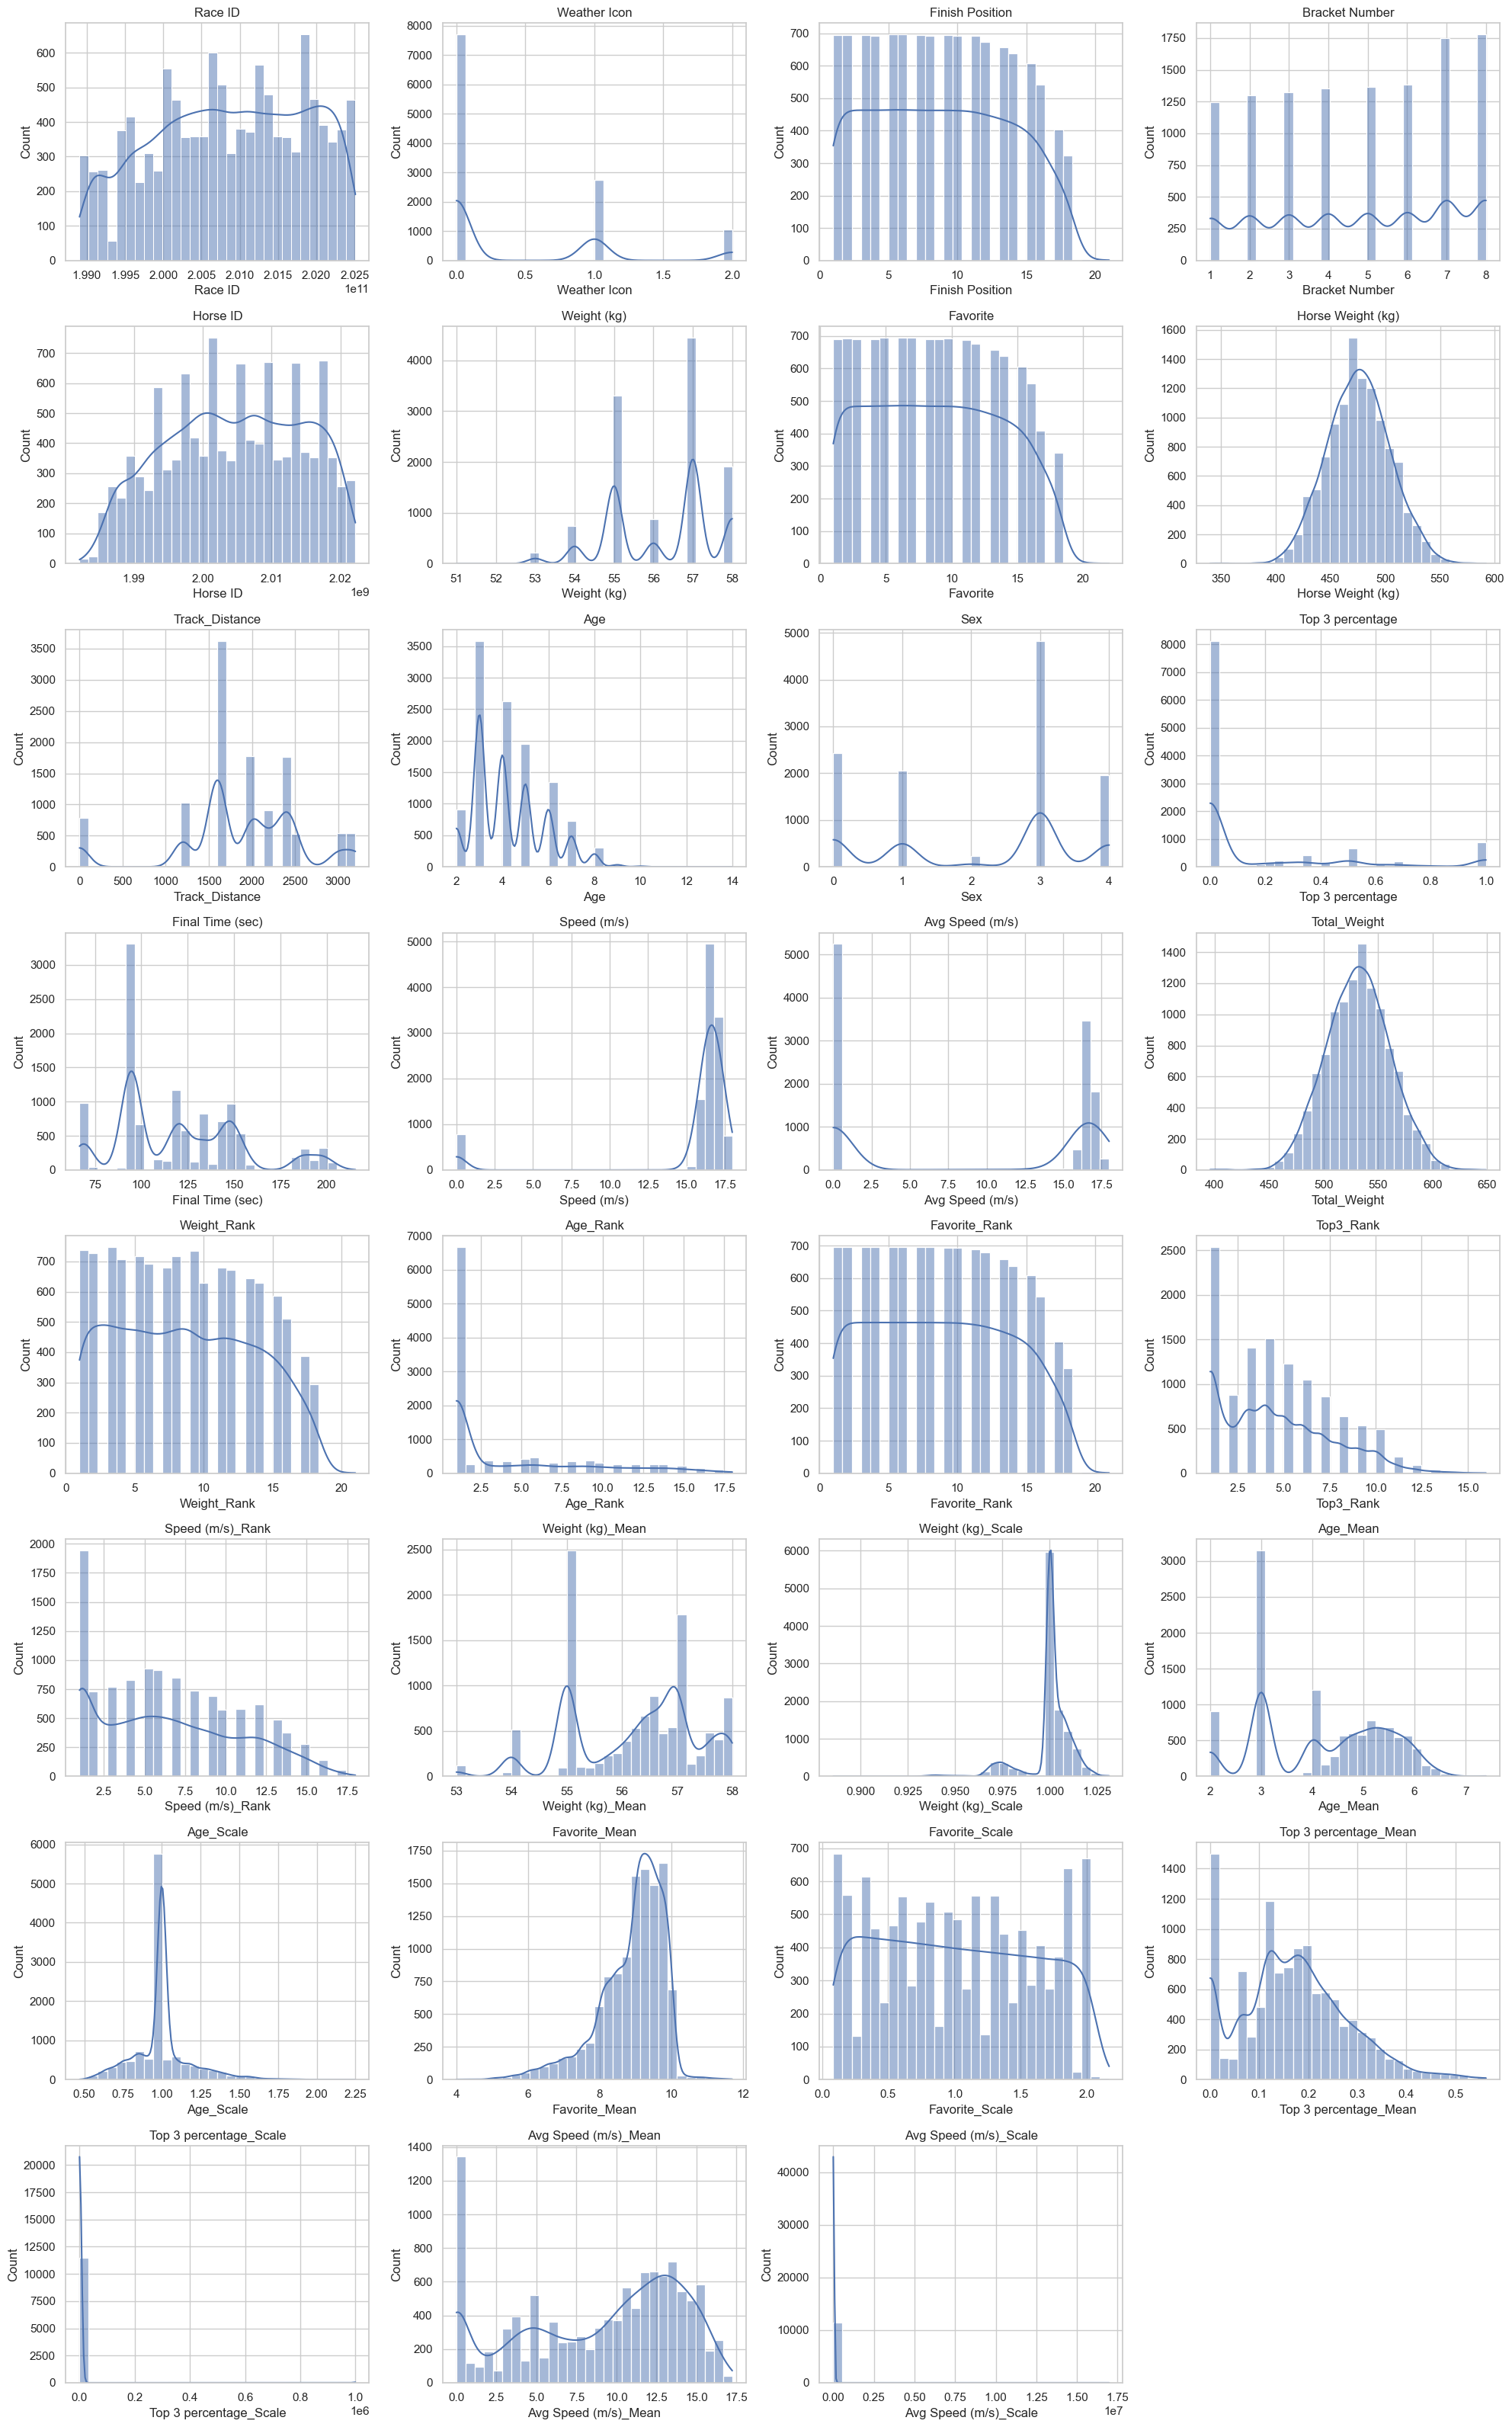

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import math
numerical_cols = new_race_df.select_dtypes(include=['float64', 'int64']).columns
cols_per_row = 4
total_cols = len(numerical_cols)
rows = math.ceil(total_cols / cols_per_row)
sns.set(style="whitegrid")
plt.figure(figsize=(cols_per_row * 5, rows * 4))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.histplot(new_race_df[col], kde=True, bins=30)
    plt.title(f'{col}')
    plt.tight_layout()

plt.show()

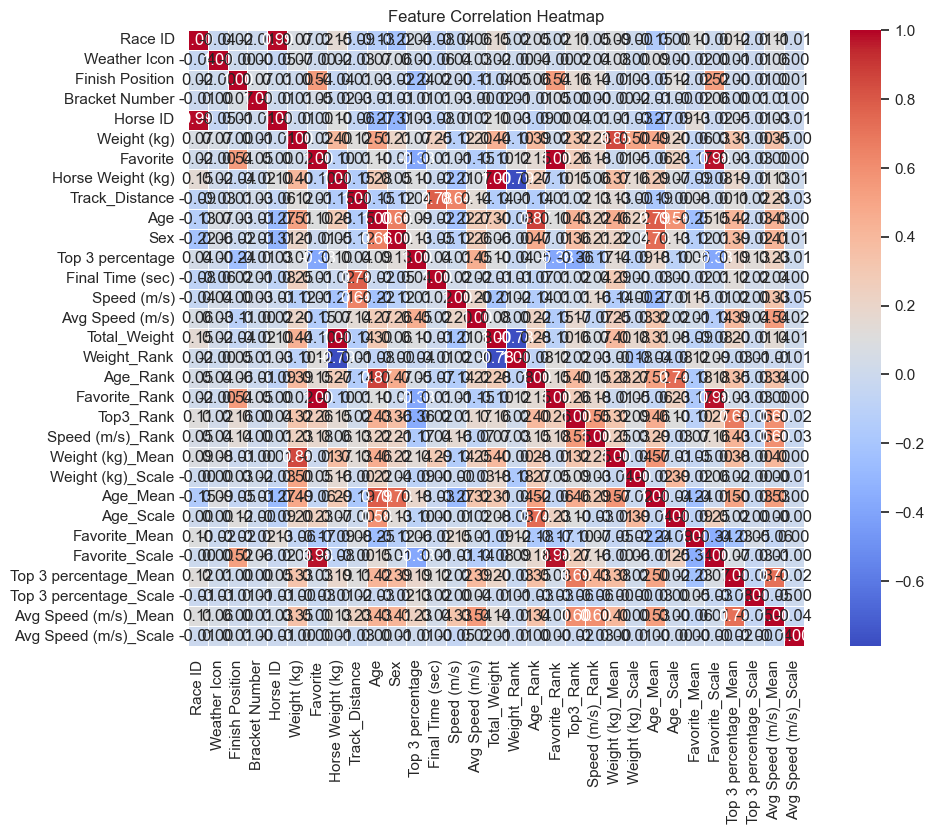

In [17]:
# Calculate the correlation coefficient matrix between numerical columns and display the heat map
corr_matrix = new_race_df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [18]:
# Get the correlation between the Finish Position column and other columns
finish_corr = corr_matrix["Speed (m/s)"].drop("Speed (m/s)")
# Sorting: By default, sorting is from high to low. If you want to sort from low to high, you can add ascending=True
sorted_corr = finish_corr.sort_values(ascending=False)
# Print sorting results
print("Finish Position Relevance Sorting:")
print(sorted_corr)

Finish Position Relevance Sorting:
Track_Distance            0.642183
Avg Speed (m/s)_Mean      0.325022
Avg Speed (m/s)           0.202176
Speed (m/s)_Rank          0.159411
Favorite_Mean             0.151584
Weather Icon              0.035831
Bracket Number            0.027208
Weight_Rank               0.023773
Final Time (sec)          0.022825
Top 3 percentage_Mean     0.019680
Favorite                  0.013388
Top 3 percentage          0.013309
Favorite_Rank             0.013067
Top3_Rank                 0.008585
Finish Position           0.001961
Top 3 percentage_Scale    0.000502
Weight (kg)_Scale        -0.000456
Horse ID                 -0.005762
Age_Scale                -0.006094
Favorite_Scale           -0.014163
Race ID                  -0.042695
Avg Speed (m/s)_Scale    -0.049599
Sex                      -0.117984
Weight (kg)              -0.122224
Age_Rank                 -0.140197
Weight (kg)_Mean         -0.140620
Horse Weight (kg)        -0.211615
Total_Weight        

In [19]:
feature_df = new_race_df.drop(columns=['Final Time (sec)','Final Time'])

## Model

In [20]:
from sklearn.model_selection import train_test_split

target_col = ['Speed (m/s)','Finish Position']
drop_cols = ['Speed (m/s)', 'Finish Position', 'Race ID', 'Horse ID','Track_Distance']

X = feature_df.drop(columns=drop_cols, errors='ignore')
y = feature_df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [21]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    reg_alpha=0.5,
    reg_lambda=0.5, 
    objective='reg:squarederror',
    random_state=42
)

model.fit(X_train, y_train['Speed (m/s)'])

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

train_mae = mean_absolute_error(y_train['Speed (m/s)'], train_preds)
test_mae = mean_absolute_error(y_test['Speed (m/s)'], test_preds)

print(f"Train MAE：{train_mae:.4f}(m/s))")
print(f"Test MAE：{test_mae:.4f}(m/s)")

Train MAE：0.1456(m/s))
Test MAE：0.2155(m/s)


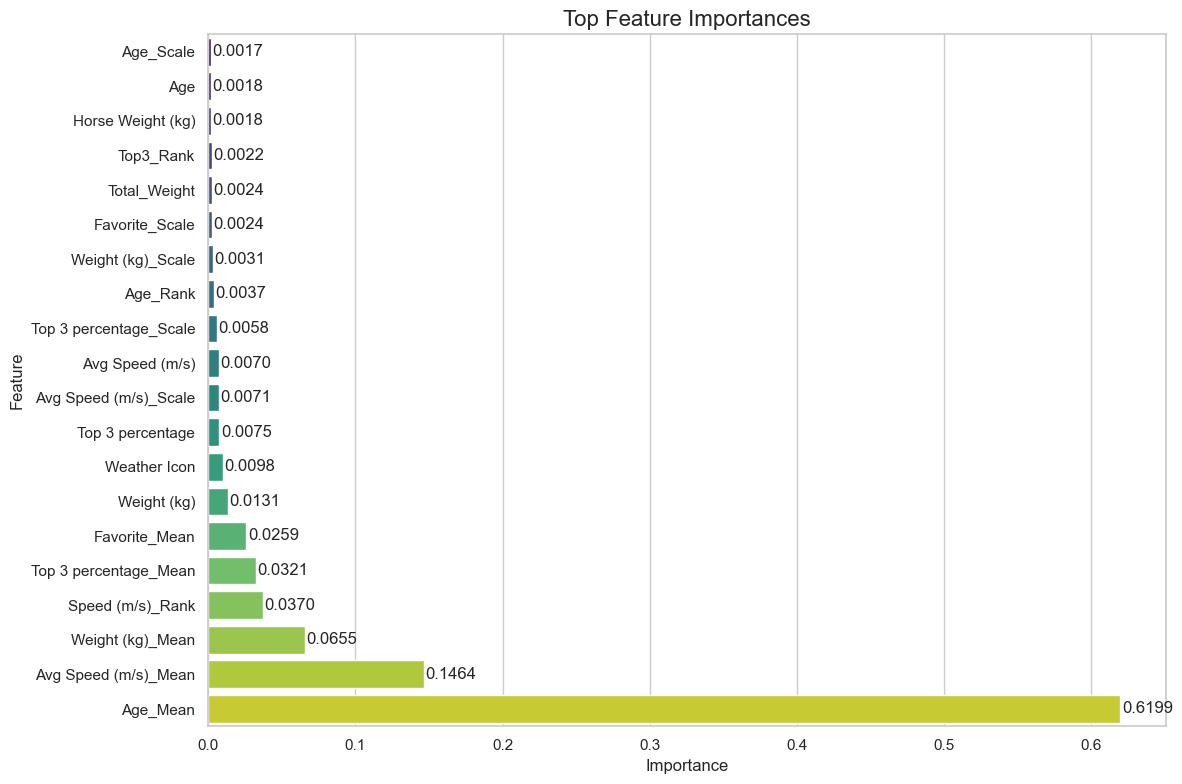

In [22]:
importances = model.feature_importances_
features = X_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_n = 20
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(top_n)
top_features = top_features.sort_values(by='Importance')
plt.figure(figsize=(12, 8))

ax = sns.barplot(
    x='Importance',
    y='Feature',
    hue='Feature',
    data=top_features,
    dodge=False,
    palette='viridis',
    legend=False
)

for i, (importance, feature) in enumerate(zip(top_features["Importance"], top_features["Feature"])):
    ax.text(importance + 0.001, i, f'{importance:.4f}', va='center')

plt.title("Top Feature Importances", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

In [23]:
# Calculate Top1_f1, Top2_f1, Finish_position_f1 in units of games
import numpy as np

def evaluate_race_predictions(df, model, test_ratio=0.3, last = False):
    grouped = df.groupby('Race ID')
    race_ids = list(grouped.groups.keys())
    selected_race_ids = np.random.choice(race_ids, size=int(len(race_ids) * test_ratio), replace=False)
    if last :
        split_index = int(len(race_ids) * (1 - test_ratio))
        selected_race_ids = race_ids[split_index:]
    
    top1_y = []
    top1_pred = []
    top3_y = []
    top3_pred = []
    position_y = []
    position_pred = []
    horseIds = []
    raceIds = []

    for race_id in selected_race_ids:
        race = grouped.get_group(race_id)
        speed_pred = []
        row_indices = []

        for index, row in race.iterrows():
            row_x = row.drop(index=['Speed (m/s)', 'Finish Position', 'Race ID','Horse ID','Track_Distance'], errors='ignore')
            row_y = row[['Speed (m/s)', 'Finish Position']]

            horseIds.append(row['Horse ID']);
            raceIds.append(row['Race ID']);
            top1_y.append(int(row_y['Finish Position']) == 1)
            top3_y.append(int(row_y['Finish Position']) <= 3)
            position_y.append(int(row_y['Finish Position']))
            
            row_x = row_x.values.reshape(1, -1)
            y_pred = model.predict(row_x)
            speed_pred.append(y_pred[0])
            row_indices.append(index)

        # print(speed_pred)
        indexed = list(enumerate(speed_pred))
        sorted_by_value = sorted(indexed, key=lambda x: -x[1])
        rank_pred = [0] * len(speed_pred)
        for i, (idx, _) in enumerate(sorted_by_value):
            rank_pred[idx] = i + 1
        # print(rank_pred)

        for rank in rank_pred:
            top1_pred.append(rank == 1)
            top3_pred.append(rank <= 3)
            position_pred.append(rank)

    return top1_y, top1_pred, top3_y, top3_pred, position_y, position_pred, horseIds, raceIds

In [24]:
from sklearn.metrics import f1_score

top1_y, top1_pred, top3_y, top3_pred, position_y, position_pred, horseIds, raceIds = evaluate_race_predictions(feature_df,model)

top1_f1 = f1_score(top1_y, top1_pred, average='weighted')
print("Top1 F1 score:", round(top1_f1, 4))

top3_f1 = f1_score(top3_y, top3_pred, average='weighted')
print("Top3 F1 score:", round(top3_f1, 4))

position_f1 = f1_score(position_y, position_pred, average='macro')
print("Finish Position F1 score:", round(position_f1, 4))

Top1 F1 score: 0.9034
Top3 F1 score: 0.779
Finish Position F1 score: 0.1316


In [25]:
top1_y, top1_pred, top3_y, top3_pred, position_y, position_pred, horseIds, raceIds = evaluate_race_predictions(feature_df,model,last=True)

result_df = pd.DataFrame({
    'RaceID': raceIds,
    'HorseID': horseIds,
    'FinishPosition_True': position_y,
    'FinishPosition_Pred': position_pred,
    'Top1_True': top1_y,
    'Top1_Pred': top1_pred,
    'Top3_True': top3_y,
    'Top3_Pred': top3_pred,
})
result_df['RaceID'] = result_df['RaceID'].astype('int64').astype(str)
result_df['HorseID'] = result_df['HorseID'].astype('int64').astype(str)
result_df.tail(18)

,RaceID,HorseID,FinishPosition_True,FinishPosition_Pred,Top1_True,Top1_Pred,Top3_True,Top3_Pred
3453,202509020611,2022105185,1,2,True,False,True,True
3454,202509020611,2022105110,2,4,False,False,True,False
3455,202509020611,2022105815,3,3,False,False,True,True
3456,202509020611,2022105467,4,5,False,False,False,False
3457,202509020611,2022103205,5,1,False,True,False,True
3458,202509020611,2022105778,6,8,False,False,False,False
3459,202509020611,2022105501,7,13,False,False,False,False
3460,202509020611,2022104617,8,6,False,False,False,False
3461,202509020611,2022104994,9,16,False,False,False,False
3462,202509020611,2022105071,10,14,False,False,False,False
